In [35]:
#需要导入的库
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt


In [3]:
#导入数据集 探索数据
data = pd.read_csv("D:/machine learning/decision tree/data.csv")

In [4]:
#表头 
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
#数据集概述
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [6]:
#删除缺失值过多的列，和观察判断来说与预测的y没有关系的列
data.drop(["Cabin","Name","Ticket"],inplace = True,axis = 1)

In [7]:
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [8]:
#处理缺失值，对缺失值较多的列进行填补，有一些特征只是缺失一两个值，可以直接采取删除记录的方法
data["Age"] = data["Age"].fillna(data["Age"].mean())
data = data.dropna()

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 9 columns):
PassengerId    889 non-null int64
Survived       889 non-null int64
Pclass         889 non-null int64
Sex            889 non-null object
Age            889 non-null float64
SibSp          889 non-null int64
Parch          889 non-null int64
Fare           889 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(2)
memory usage: 69.5+ KB


In [12]:
#将二分类变量转化为数值型变量
#astype能够将一个pandas对象转换为某种类型，和apply(int(x))不同,astype可以将文本类转化为数字，用这个方式可以很便捷地将二分类特征转化为0~1
data["Sex"] = (data["Sex"]=="male").astype("int")

In [14]:
#将三分类变量转化为数值型变量
labels = data["Embarked"].unique().tolist()
data["Embarked"] = data["Embarked"].apply(lambda x: labels.index(x))

In [15]:
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,0
1,2,1,1,0,38.0,1,0,71.2833,1
2,3,1,3,0,26.0,0,0,7.9250,0
3,4,1,1,0,35.0,1,0,53.1000,0
4,5,0,3,1,35.0,0,0,8.0500,0


In [16]:
#提取标签和特征矩阵，分测试集和训练集
x = data.iloc[:,data.columns != "Survived"]
y = data.iloc[:,data.columns == "Survived"]

from sklearn.model_selection import train_test_split
Xtrain,Xtest,Ytrain,Ytest = train_test_split(x,y,test_size = 0.3)

In [17]:
#索引是乱序 需要重新修正索引 
Xtrain

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
565,566,3,1,24.000000,2,0,24.1500,0
531,532,3,1,29.699118,0,0,7.2292,1
83,84,1,1,28.000000,0,0,47.1000,0
151,152,1,0,22.000000,1,0,66.6000,0
636,637,3,1,32.000000,0,0,7.9250,0
107,108,3,1,29.699118,0,0,7.7750,0
194,195,1,0,44.000000,0,0,27.7208,1
19,20,3,0,29.699118,0,0,7.2250,1
317,318,2,1,54.000000,0,0,14.0000,0
181,182,2,1,29.699118,0,0,15.0500,1


In [19]:
#修正测试集和训练集地索引
for i in [Xtrain, Xtest,Ytrain,Ytest]:
    i.index = range(i.shape[0])

In [20]:
Xtrain.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,566,3,1,24.000000,2,0,24.1500,0
1,532,3,1,29.699118,0,0,7.2292,1
2,84,1,1,28.000000,0,0,47.1000,0
3,152,1,0,22.000000,1,0,66.6000,0
4,637,3,1,32.000000,0,0,7.9250,0


In [25]:
#导入模型，粗略跑一下，查看结果
clf = DecisionTreeClassifier(random_state=25)
clf = clf.fit(Xtrain,Ytrain)
score1 = clf.score(Xtest,Ytest)
score1

0.7677902621722846

In [26]:
#交叉验证
score2 = cross_val_score(clf,x,y,cv=10).mean()
score2

0.7469611848825333

0.8166624106230849


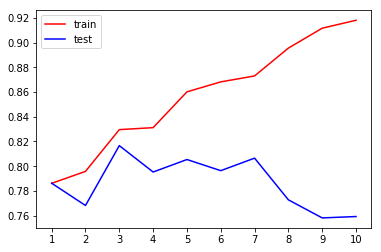

In [36]:
tr = []
te = []
for i in range(10):
    clf = DecisionTreeClassifier(random_state=25,max_depth=i+1,criterion="entropy")
    clf = clf.fit(Xtrain,Ytrain)
    score_tr = clf.score(Xtrain,Ytrain)
    score_te = cross_val_score(clf,x,y,cv= 10).mean()
    tr.append(score_tr)
    te.append(score_te)
print(max(te))
plt.plot(range(1,11),tr,color="red",label = "train")
plt.plot(range(1,11),te,color="blue",label = "test")
plt.xticks(range(1,11))
plt.legend()
plt.show()

In [41]:
#用网格搜索调整参数
import numpy as np
gini_thresholds = np.linspace(0,0.5,20)

#一串参数和这些参数对应的，我们希望网格搜索来搜索的参数的取值范围
parameters = {"criterion":("gini","entropy")
             ,"splitter":("best","random")
             ,"max_depth":[*range(1,10)]
             ,"min_samples_leaf" :[*range(1,50,5)]
             ,"min_impurity_decrease":np.linspace(0,0.5,50)
             }
clf = DecisionTreeClassifier(random_state = 25)
GS = GridSearchCV(clf,parameters,cv = 10)
GS.fit(Xtrain,Ytrain)

GS.best_params_
GS.best_score_

0.819935691318328

In [42]:
GS.best_params_

{'criterion': 'gini',
 'max_depth': 3,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 6,
 'splitter': 'best'}

In [43]:
GS.best_score_

0.819935691318328

In [45]:
clf = DecisionTreeClassifier( criterion= 'gini',
 max_depth= 6,
 min_impurity_decrease= 0.0,
 min_samples_leaf= 1,
 splitter='random')

In [47]:
clf.fit(Xtrain,Ytrain)
score = clf.score(Xtest,Ytest)
score

0.797752808988764